In [4]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  # we will use this for plotting

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


In [8]:
# Sample dataset of job postings in January
job_postings_jan = pd.DataFrame({
    'job_id': [1, 2, 3, 4, 5],
    'job_title': ['Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Data Scientist', 'Data Engineer'],
    'company': ['Company A', 'Company B', 'Company C', 'Company D', 'Company E'],
    'job_posted_date': pd.to_datetime(['2024-01-02', '2024-01-07', '2024-01-14', '2024-01-19', '2024-01-24'])
})

job_postings_jan

,job_id,job_title,company,job_posted_date
0,1,Data Scientist,Company A,2024-01-02
1,2,Data Analyst,Company B,2024-01-07
2,3,Machine Learning Engineer,Company C,2024-01-14
3,4,Data Scientist,Company D,2024-01-19
4,5,Data Engineer,Company E,2024-01-24


In [9]:
# Sample dataset of job postings in February
job_postings_feb = pd.DataFrame({
    'job_id': [6, 7, 8, 9, 10],
    'job_title': ['Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Data Scientist', 'Data Engineer'],
    'company': ['Company F', 'Company G', 'Company H', 'Company I', 'Company J'],
    'job_posted_date': pd.to_datetime(['2024-02-05', '2024-02-09', '2024-02-12', '2024-02-18', '2024-02-22'])
})

job_postings_feb

,job_id,job_title,company,job_posted_date
0,6,Data Scientist,Company F,2024-02-05
1,7,Data Analyst,Company G,2024-02-09
2,8,Machine Learning Engineer,Company H,2024-02-12
3,9,Data Scientist,Company I,2024-02-18
4,10,Data Engineer,Company J,2024-02-22


In [17]:
janfeb = pd.concat([job_postings_jan, job_postings_feb], ignore_index=True)

janfeb


,job_id,job_title,company,job_posted_date
0,1,Data Scientist,Company A,2024-01-02
1,2,Data Analyst,Company B,2024-01-07
2,3,Machine Learning Engineer,Company C,2024-01-14
3,4,Data Scientist,Company D,2024-01-19
4,5,Data Engineer,Company E,2024-01-24
5,6,Data Scientist,Company F,2024-02-05
6,7,Data Analyst,Company G,2024-02-09
7,8,Machine Learning Engineer,Company H,2024-02-12
8,9,Data Scientist,Company I,2024-02-18
9,10,Data Engineer,Company J,2024-02-22


In [ ]:
df['job_posted_month'] = df['job_posted_date'].dt.strftime('%b') # Extracting month from job_posted_date column

df

In [ ]:
# dict_months = {
#     'Jan': df_jan,
#     'Feb': df_feb,
#     'Mar': df_mar,
#     'Apr': df_apr,
#     'May': df_may,
#     'Jun': df_jun,
#     'Jul': df_jul,
#     'Aug': df_aug,
#     'Sep': df_sep,
#     'Oct': df_oct,
#     'Nov': df_nov,
#     'Dec': df_dec
# }

months = df['job_posted_month'].unique()

dict_months = {month: df[df['job_posted_month'] == month] for month in months}

dict_months['Jan']

In [31]:
#Boss needs 2023 Quarter 1

df_q1 = pd.concat([dict_months['Jan'], dict_months['Feb'], dict_months['Mar']], ignore_index=True)

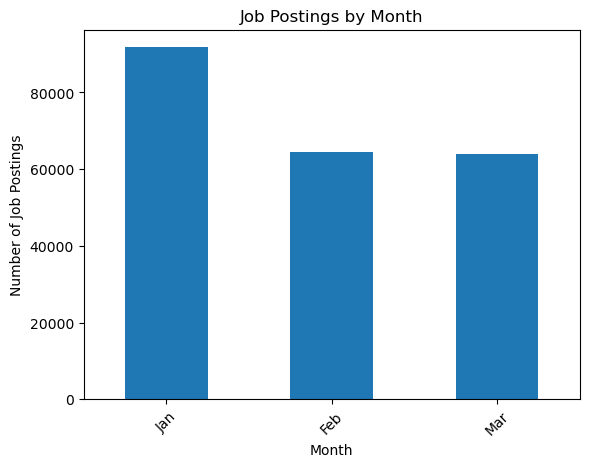

In [42]:
df_q1['job_posted_month'].value_counts().plot(kind='bar')
plt.title('Job Postings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [43]:
df.to_csv('jobs_data.csv', index=False)